# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json
import requests

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [38]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [39]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}units=Imperial&appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | west island
Processing Record 2 of Set 1 | arboletes
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | crucecita
Processing Record 5 of Set 1 | sao joao da barra
Processing Record 6 of Set 1 | takamaka
City not found. Skipping...
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | dayr hafir
Processing Record 9 of Set 1 | kotlas
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | stanley
Processing Record 12 of Set 1 | anadyr
Processing Record 13 of Set 1 | recreo
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | tazovsky
Processing Record 16 of Set 1 | casalmaggiore
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | margaret river
Processing Record 19 of Set 1 | navasota
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | port mathurin
Processing Record 22 

Processing Record 41 of Set 4 | trincomalee
Processing Record 42 of Set 4 | port elizabeth
Processing Record 43 of Set 4 | ust-nera
Processing Record 44 of Set 4 | nejo
Processing Record 45 of Set 4 | vadso
Processing Record 46 of Set 4 | padang
Processing Record 47 of Set 4 | camacupa
Processing Record 48 of Set 4 | high rock
Processing Record 49 of Set 4 | hilo
Processing Record 0 of Set 5 | colonia
Processing Record 1 of Set 5 | torghay
Processing Record 2 of Set 5 | port alfred
Processing Record 3 of Set 5 | egilsstadir
Processing Record 4 of Set 5 | sittwe
Processing Record 5 of Set 5 | yaren
Processing Record 6 of Set 5 | staunton
Processing Record 7 of Set 5 | alice springs
Processing Record 8 of Set 5 | santaluz
Processing Record 9 of Set 5 | seybaplaya
Processing Record 10 of Set 5 | hirara
Processing Record 11 of Set 5 | santarem
Processing Record 12 of Set 5 | lata
Processing Record 13 of Set 5 | linxia chengguanzhen
Processing Record 14 of Set 5 | uruzgan
Processing Record 

Processing Record 32 of Set 8 | krutinka
Processing Record 33 of Set 8 | east london
Processing Record 34 of Set 8 | broken hill
Processing Record 35 of Set 8 | port moresby
Processing Record 36 of Set 8 | luorong
Processing Record 37 of Set 8 | puerto baquerizo moreno
Processing Record 38 of Set 8 | letterkenny
Processing Record 39 of Set 8 | hovd
Processing Record 40 of Set 8 | saint-paul
Processing Record 41 of Set 8 | kibre mengist
Processing Record 42 of Set 8 | nasir
Processing Record 43 of Set 8 | alamo
Processing Record 44 of Set 8 | millerovo
Processing Record 45 of Set 8 | vanino
Processing Record 46 of Set 8 | sejenane
Processing Record 47 of Set 8 | tobelo
Processing Record 48 of Set 8 | kralendijk
Processing Record 49 of Set 8 | partille
Processing Record 0 of Set 9 | saint-francois
Processing Record 1 of Set 9 | usogorsk
Processing Record 2 of Set 9 | kosh-agach
Processing Record 3 of Set 9 | olyokminsk
Processing Record 4 of Set 9 | kendari
Processing Record 5 of Set 9 |

Processing Record 21 of Set 12 | ambovombe
Processing Record 22 of Set 12 | cockburn town
Processing Record 23 of Set 12 | zhezqazghan
Processing Record 24 of Set 12 | saint-philippe
Processing Record 25 of Set 12 | gagnoa
Processing Record 26 of Set 12 | itoman
Processing Record 27 of Set 12 | flin flon
Processing Record 28 of Set 12 | mandiana
Processing Record 29 of Set 12 | evanston
Processing Record 30 of Set 12 | suva
Processing Record 31 of Set 12 | san francisco
Processing Record 32 of Set 12 | fort st. john
Processing Record 33 of Set 12 | baruun-urt
Processing Record 34 of Set 12 | gijang
Processing Record 35 of Set 12 | konstantinovka
Processing Record 36 of Set 12 | san juan de miraflores
Processing Record 37 of Set 12 | goondiwindi
Processing Record 38 of Set 12 | broome
Processing Record 39 of Set 12 | tahe
Processing Record 40 of Set 12 | harstad
Processing Record 41 of Set 12 | the pas
-----------------------------
Data Retrieval Complete      
-------------------------

In [40]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [41]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,west island,-12.1568,96.8225,78.78,83,40,14.97,CC,1691507030
1,arboletes,8.8505,-76.4269,83.37,78,100,9.48,CO,1691507031
2,iqaluit,63.7506,-68.5145,44.33,87,75,9.22,CA,1691506815
3,crucecita,-28.9500,-58.9833,61.68,58,100,11.01,AR,1691507032
4,sao joao da barra,-21.6403,-41.0511,80.69,62,0,21.56,BR,1691507002


In [42]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [43]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,78.78,83,40,14.97,CC,1691507030
1,arboletes,8.8505,-76.4269,83.37,78,100,9.48,CO,1691507031
2,iqaluit,63.7506,-68.5145,44.33,87,75,9.22,CA,1691506815
3,crucecita,-28.9500,-58.9833,61.68,58,100,11.01,AR,1691507032
4,sao joao da barra,-21.6403,-41.0511,80.69,62,0,21.56,BR,1691507002


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

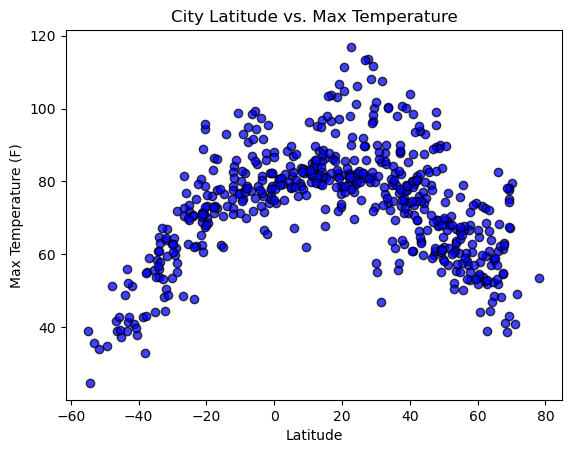

In [44]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],marker="o",color="b",edgecolor="black",alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature")
plt.grid=True


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

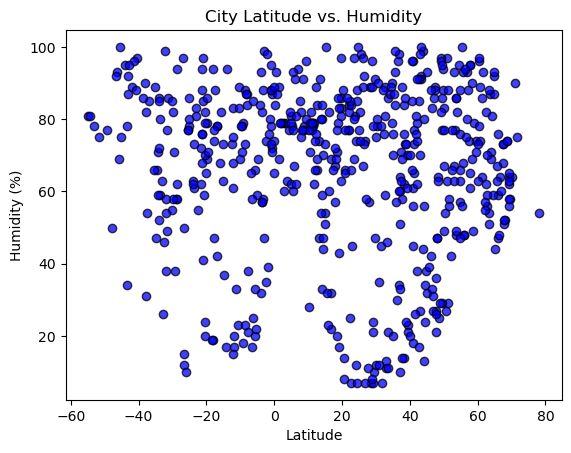

In [46]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],marker="o",color="b",edgecolor="black",alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid=True

#Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

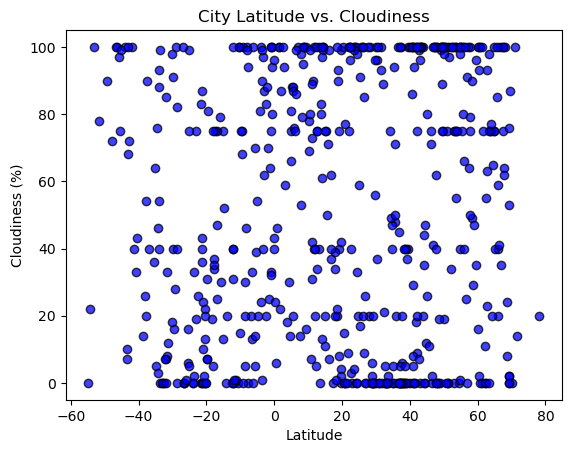

In [47]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],marker="o",color="b",edgecolor="black",alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid=True

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

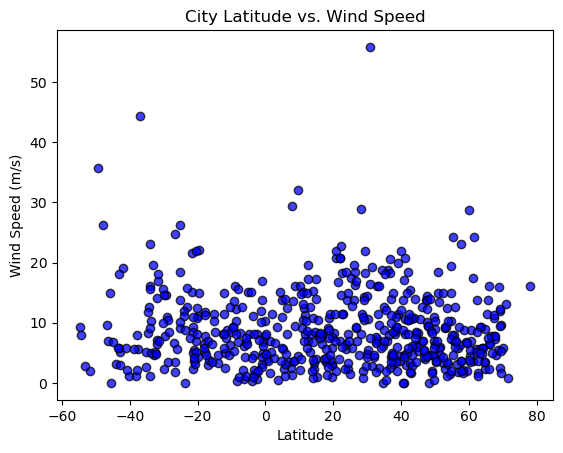

In [48]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],marker="o",color="b",edgecolor="black",alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.grid=True

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [78]:
# Define a function to create Linear Regression plots
def linear_regression_function(x_values,y_values,y_label,coordinates):
    correlation = st.pearsonr(x_values,y_values)
    print(f"The r value is:  {correlation[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()
    

In [79]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,arboletes,8.8505,-76.4269,83.37,78,100,9.48,CO,1691507031
2,iqaluit,63.7506,-68.5145,44.33,87,75,9.22,CA,1691506815
6,dayr hafir,36.1569,37.7078,97.92,30,0,18.70,SY,1691507032
7,kotlas,61.2611,46.6556,73.13,64,0,3.60,RU,1691506816
9,stanley,54.8680,-1.6985,66.51,57,40,14.97,GB,1691507033


In [80]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,78.78,83,40,14.97,CC,1691507030
3,crucecita,-28.9500,-58.9833,61.68,58,100,11.01,AR,1691507032
4,sao joao da barra,-21.6403,-41.0511,80.69,62,0,21.56,BR,1691507002
5,puerto ayora,-0.7393,-90.3518,78.76,87,100,5.01,EC,1691507032
8,avarua,-21.2078,-159.7750,62.65,94,40,2.30,CK,1691507033


###  Temperature vs. Latitude Linear Regression Plot

The r value is:  -0.6006339047892106


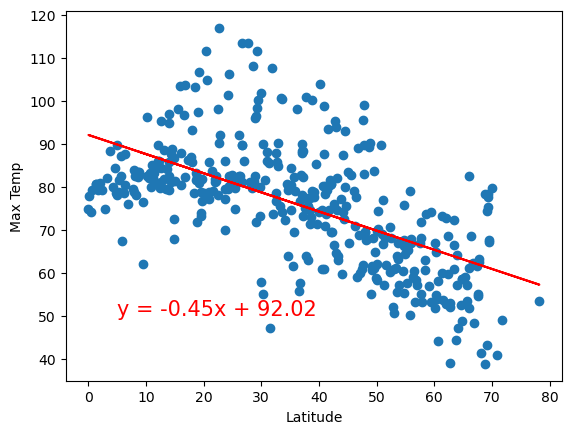

In [81]:
# Linear regression on Northern Hemisphere
linear_regression_function(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"Max Temp",(5,50))


The r value is:  0.841194994397723


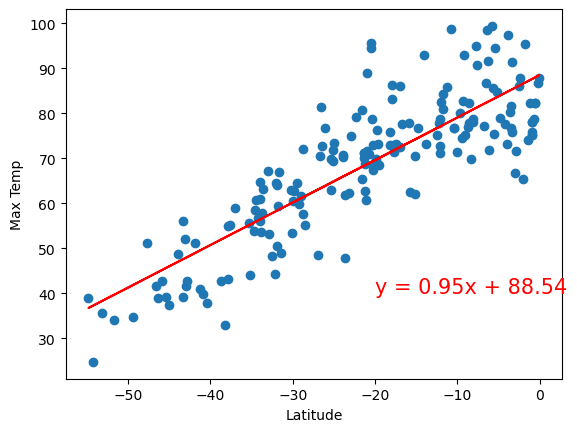

In [83]:
# Linear regression on Southern Hemisphere
linear_regression_function(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"Max Temp",(-20,40))

**Discussion about the linear relationship:** The northern hemisphere data shows a weak negative correlation between maximum temperature and degrees latitude, which makes sense because the further you move north from the equator, the cooler the temperature.  We can see that if we were to use the regression line to predict temperatures, the negative slope would cause the returned temperature values to decrease as the latitude increased.  The souther hemisphere data shows a strong positive correlation with an r-value of 0.84. This also makes sense because temperatures increase as we moved closer to the equator (latitude = 0).  The regression line for the southern hemisphere would return larger temperatures for greater (or less negative) latitudes due to its positive slope.

### Humidity vs. Latitude Linear Regression Plot

The r value is:  -0.04021220061638609


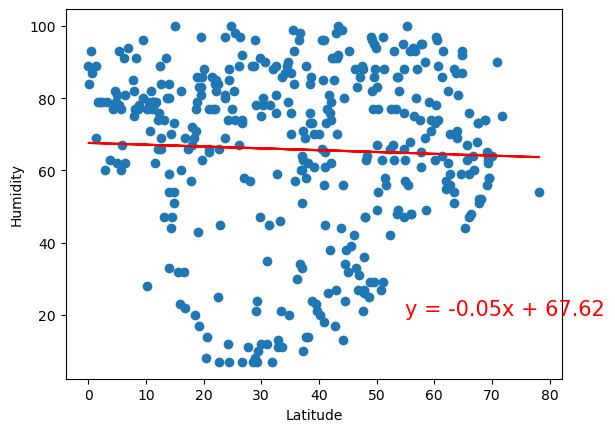

In [85]:
# Northern Hemisphere
linear_regression_function(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],"Humidity",(55,20))

The r value is:  -0.16956604029070088


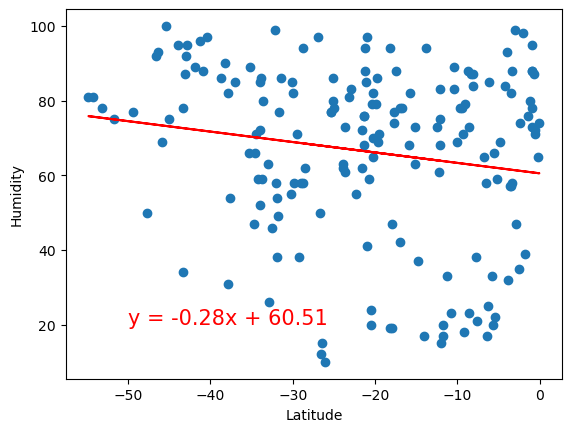

In [86]:
# Southern Hemisphere
linear_regression_function(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"Humidity",(-50,20))

**Discussion about the linear relationship:** The plots for both the northern and southern hemisphere demonstrate negative correlation, as both r-values are negative.  The r-value for the north is so close to 0 that we could say there is no correlation between latitude and humidity.  For the southern hemisphere, there is a slightly stronger correlation, but it would still be categorized as weak.  

### Cloudiness vs. Latitude Linear Regression Plot

The r value is:  0.0006561781679887638


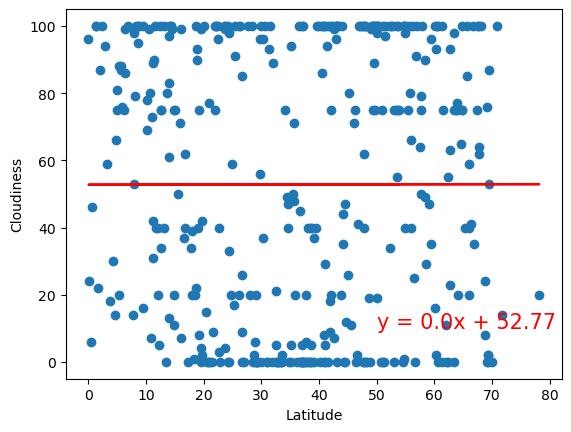

In [87]:
# Northern Hemisphere
linear_regression_function(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],"Cloudiness",(50,10))

The r value is:  0.006125230668220093


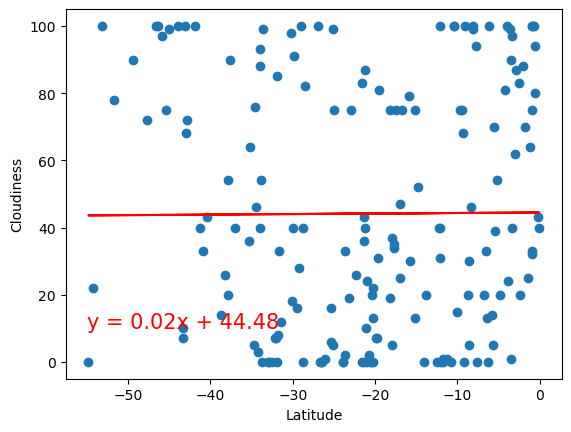

In [90]:
# Southern Hemisphere
linear_regression_function(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],"Cloudiness",(-55,10))

**Discussion about the linear relationship:** For both the northern and southern hemispheres, the regression plots indicate no correlation with r-values almost equal to 0.  The northern regression line has a slope of 0, meaning changes in latitude will not produce changes in cloudiness.  For the southern hemisphere, the slope of 0.02 for the regression line will produce extremely small changes in cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is:  -0.06859007198823314


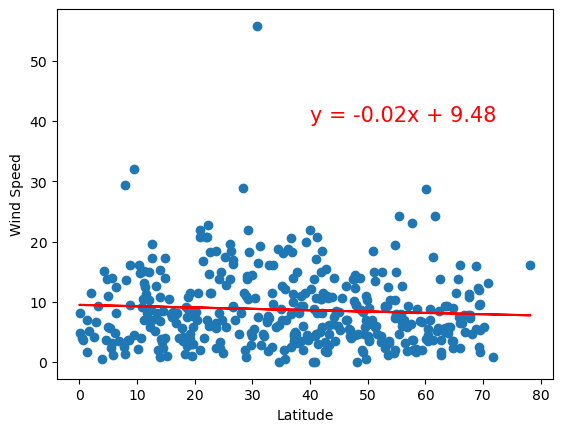

In [91]:
# Northern Hemisphere
linear_regression_function(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],"Wind Speed",(40,40))

The r value is:  -0.17675286947819893


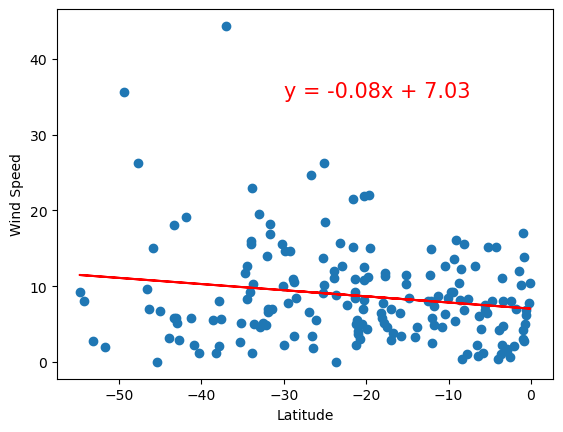

In [92]:
# Southern Hemisphere
linear_regression_function(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],"Wind Speed",(-30,35))

**Discussion about the linear relationship:** For both the northern and southern hemisphere, the plots show weak negative correlation between wind speed and latitude, with the northern hemisphere being weaker.  Both regression lines have a negative slope, meaning as latitude increases, wind speed will decrease.